## Exploratory Analysis

Exploratory analysis of SemEval 2017 dataset. Don't download files as I've already got them 

In [1]:
import os
from glob import glob
import unicodedata
import pandas as pd

files = glob("../data/SemEval2017/GOLD/Subtask_A/twitter*.txt", recursive=True)
sorted(files)

['../data/SemEval2017/GOLD/Subtask_A/twitter-2013dev-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2013test-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2013train-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2014sarcasm-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2014test-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2015test-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2015train-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2016dev-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2016devtest-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2016test-A.txt',
 '../data/SemEval2017/GOLD/Subtask_A/twitter-2016train-A.txt']

In [2]:
import csv
import pandas as pd

def read_table(path):
    """
    Read SemEval table and return dataframe
    """
    df = pd.read_table(path, header=None, quoting=csv.QUOTE_NONE, encoding="utf-8")
    # Get rid of last column

    if len(df.columns) > 3:
        del df[3]
    df.columns = ["id", "label", "text"]
    if df["text"].isna().any():
        print(path)
        print(df[df["text"].isna()])
    df = df[df["text"].notna()]
    #df.set_index("id", inplace=True)
    return df

pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 100


train_df = pd.concat([read_table(f) for f in files])
train_df.drop_duplicates("id", inplace=True)
train_df.set_index("id", inplace=True)
print("Len train : ", train_df.shape)



../data/SemEval2017/GOLD/Subtask_A/twitter-2016test-A.txt
      id label text
11064  "   NaN  NaN
Len train :  (49645, 2)


In [16]:
test_df = read_table("../data/SemEval2017/SemEval2017-task4-test.subtask-A.english.txt")
test_df.set_index("id", inplace=True)
test_df

,label,text
id,,
801989080477154944,neutral,#ArianaGrande Ari By Ariana Grande 80% Full https://t.co/ylhCMETHHW #Singer #Actress https://t.co/lTrb1JQiEA
801989272341453952,positive,Ariana Grande KIIS FM Yours Truly CD listening party in Burbank https://t.co/ClQIcx8Z6V #ArianaGrande
801990978424962944,positive,Ariana Grande White House Easter Egg Roll in Washington https://t.co/jdjL9swWM8 #ArianaGrande
801996232553963008,positive,#CD #Musics Ariana Grande Sweet Like Candy 3.4 oz 100 ML Sealed In Box 100% Authenic New https://t.co/oFmp0bOvZy… https://t.co/WIHLch9KtK
801998343442407040,neutral,SIDE TO SIDE 😘 @arianagrande #sidetoside #arianagrande #musically #comunidadgay #lgbt🌈 #LOTB… https://t.co/tEd8rftAxV
...,...,...
805699615781625856,positive,@dansen17 update: Zac Efron kissing a puppy https://t.co/4hTw1U8Azs
805701709356003328,neutral,#zac efron sex pic skins michelle sex https://t.co/EQFbbfuJSA
805701818357579776,neutral,First Look at Neighbors 2 with Zac Efron Shirtless! (PHOTO)... https://t.co/5C68gj5D9V #zacefron


Normalicemos los unicode, se ven horribles

In [21]:
train_df.loc[254589549202767873]["text"].encode("utf-8").decode("unicode-escape")

'Parsons also confirmed w/ TW reporter abt JLin’s popularity, also ’promised’ he’ll visit Taiwan next yr http://t.co/ER67bSxy'

In [22]:
sum([str(t) in train_df.index for t in test_df.index])

0

In [23]:
import unicodedata

def unescape_text(text):
    try:
        return text.encode("utf-8").decode("unicode-escape")
    except UnicodeDecodeError:
        print("Error with: ", text)
        return text 
train_df["text"] = train_df["text"].apply(unescape_text)
test_df["text"] = test_df["text"].apply(unescape_text)


Error with:  @adamploski @sprint my texts arent working again...for the 2nd day in a row... c'mon #Sprint ! U got me feeling like a T-Mobile customer :-\
Error with:  @ruraljules If it makes you feeling any better....I got dumped by my 1st boyfriend, by note, right before Valentine's Day. :\
Error with:  O.K. Trump you won the election; don't fuck with Medicare or S.S. Fuck Ryans' proposal to gut Medicare & Medicaid; Be a FDR!\


<ipython-input-23-30ebc7e4046b>:5: DeprecationWarning: invalid escape sequence '\m'
  return text.encode("utf-8").decode("unicode-escape")
<ipython-input-23-30ebc7e4046b>:5: DeprecationWarning: invalid escape sequence '\o'
  return text.encode("utf-8").decode("unicode-escape")
<ipython-input-23-30ebc7e4046b>:5: DeprecationWarning: invalid escape sequence '\,'
  return text.encode("utf-8").decode("unicode-escape")
<ipython-input-23-30ebc7e4046b>:5: DeprecationWarning: invalid escape sequence '\l'
  return text.encode("utf-8").decode("unicode-escape")
<ipython-input-23-30ebc7e4046b>:5: DeprecationWarning: invalid escape sequence '\_'
  return text.encode("utf-8").decode("unicode-escape")
<ipython-input-23-30ebc7e4046b>:5: DeprecationWarning: invalid escape sequence '\ '
  return text.encode("utf-8").decode("unicode-escape")
<ipython-input-23-30ebc7e4046b>:5: DeprecationWarning: invalid escape sequence '\('
  return text.encode("utf-8").decode("unicode-escape")
<ipython-input-23-30ebc7e40

Salvemos esto así nos olvidamos de una vez

In [24]:
train_df.to_csv("../data/SemEval2017/train.csv")
test_df.to_csv("../data/SemEval2017/test.csv")

In [25]:
train_df = pd.read_csv("../data/SemEval2017/train.csv")
test_df = pd.read_csv("../data/SemEval2017/test.csv")

print(f"Train instances = {len(train_df)}")
print(f"Test instances  = {len(test_df)}")


Train instances = 49645
Test instances  = 12284


In [26]:
train_df.isna()

,id,label,text
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
49640,False,False,False
49641,False,False,False
49642,False,False,False
49643,False,False,False


(array([3.0000e+00, 2.3700e+02, 1.5450e+03, 3.7920e+03, 5.9930e+03,
        8.0010e+03, 1.1819e+04, 1.8226e+04, 2.8000e+01, 1.0000e+00]),
 array([  1.,  20.,  39.,  58.,  77.,  96., 115., 134., 153., 172., 191.]),
 <BarContainer object of 10 artists>)

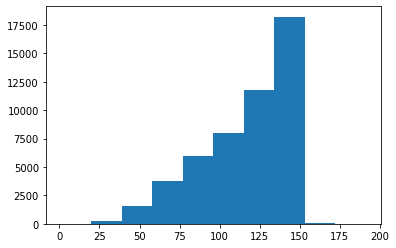

In [27]:
import matplotlib.pyplot as plt


plt.hist(train_df["text"].apply(lambda x: len(x)))

There are repeated rows => remove duplicates

(array([5.600e+01, 3.080e+02, 7.350e+02, 1.101e+03, 1.394e+03, 1.815e+03,
        2.274e+03, 4.560e+03, 3.900e+01, 2.000e+00]),
 array([  9. ,  26.4,  43.8,  61.2,  78.6,  96. , 113.4, 130.8, 148.2,
        165.6, 183. ]),
 <BarContainer object of 10 artists>)

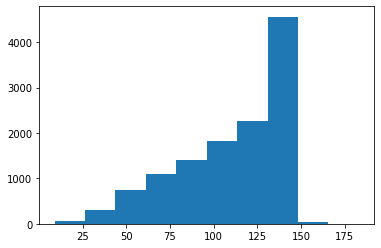

In [28]:
import matplotlib.pyplot as plt


plt.hist(test_df["text"].apply(lambda x: len(x)))

In [29]:
train_df["label"].value_counts(normalize=True)

neutral     0.448041
positive    0.395992
negative    0.155967
Name: label, dtype: float64

In [30]:
test_df["label"].value_counts(normalize=True)

neutral     0.483312
negative    0.323347
positive    0.193341
Name: label, dtype: float64

Majority are neutral